In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
os.getcwd()

'C:\\Users\\sai krishna\\music genre classification'

In [3]:
os.chdir('spec_images')
path=os.getcwd()

print(path)


C:\Users\sai krishna\music genre classification\spec_images


In [4]:
random_seed = 0

genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

print("List of Genres = ",genres,"\n\nNo. of categories = ", len(genres))

List of Genres =  {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9} 

No. of categories =  10


In [5]:
def load_images_and_labels(genres):
    img_lst=[]
    labels=[]
    for index, genre in enumerate(genres):
        for image_name in os.listdir(path+"/"+genre):
            
            img = cv2.imread(path+"/"+genre+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            sharpen_kernel= np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            
            img = cv2.filter2D(img, -1, sharpen_kernel)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(genres)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  1000 
No. of labels loaded =  1000
<class 'list'> <class 'list'>


In [6]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1000, 227, 227, 3) 
Labels shape =  (1000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


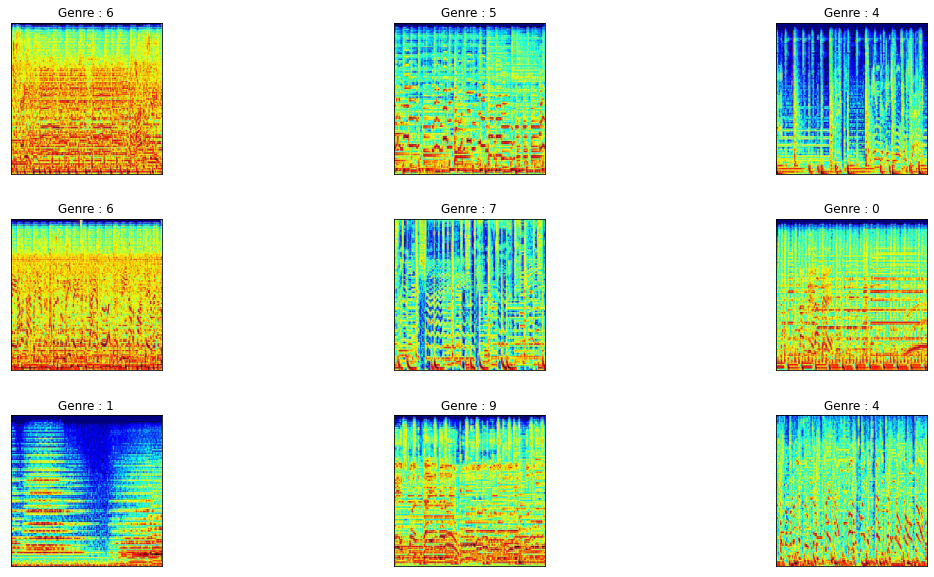

In [7]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Genre : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [8]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)


'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

In [9]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (1000, 227, 227, 3) 
Labels shape after shuffling =  (1000,)


In [10]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (1000, 227, 227, 3)


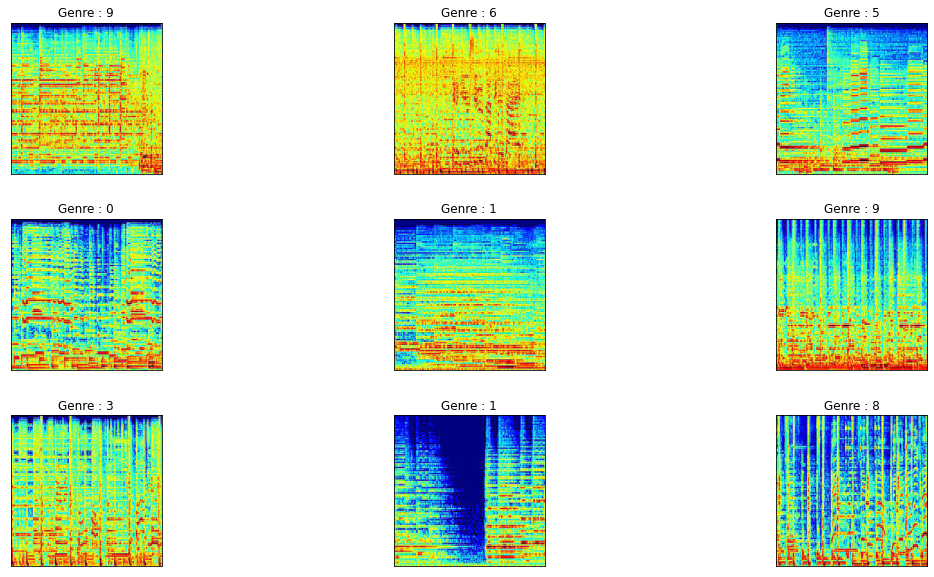

In [11]:
display_rand_images(images, labels)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (800, 227, 227, 3)
y_train shape =  (800,)

x_test shape =  (200, 227, 227, 3)
y_test shape =  (200,)


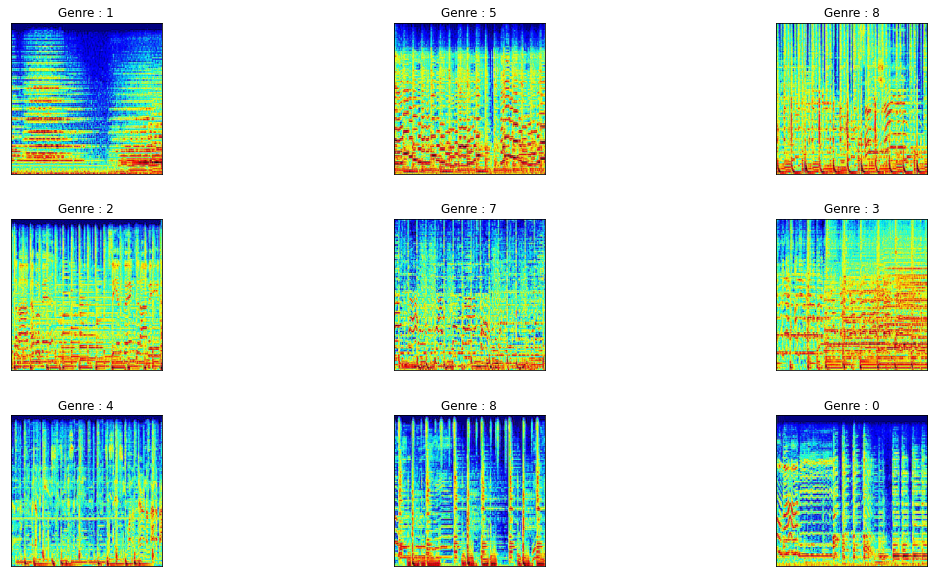

In [13]:
display_rand_images(x_train, y_train)

In [14]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 227, 227, 3) (200, 227, 227, 3) (800,) (200,)


In [15]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.1)

In [15]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
#y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
#print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))


((800, 227, 227, 3), (800, 10))
((200, 227, 227, 3), (200, 10))


In [16]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

#val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
#val_generator.fit(x_val)
test_generator.fit(x_test)

In [17]:
from tensorflow.keras.layers import Input, Conv2D, \
     BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model

def create_model(input_shape, num_genres):
    input = Input(shape=input_shape)

    x = Conv2D(filters=96,
           kernel_size=11,
           strides=4,
           padding='same',
           activation='relu')(input)  # 1st convolutional layer
    #x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=3, strides=2)(x)

    x = Conv2D(filters=256,
           kernel_size=5,
           padding='same',
           activation='relu')(x)  # 2nd convolutional layer
    #x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=3, strides=2)(x)

    x = Conv2D(filters=384,
           kernel_size=3,
           padding='same',
           activation='relu')(x)  # 3rd convolutional layer

    x = Conv2D(filters=384,
           kernel_size=3,
           padding='same',
           activation='relu')(x)  # 4th convolutional layer

    x = Conv2D(filters=256,
           kernel_size=3,
           padding='same',
           activation='relu')(x)  # 5th convolutional layer
    #x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=3, strides=2)(x)

    x = Flatten()(x)
    x = Dense(units=4096, activation='relu')(x)
    x = Dense(units=4096, activation='relu')(x)
    x = Dropout(rate=0.5)(x)

    output = Dense(units=10, activation='softmax')(x)
    
    model = Model(inputs=input, outputs=output)
    return model

In [18]:
model = create_model(x_train[0].shape, 10)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 57, 57, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       132748

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [21]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(
  monitor='val_loss', 
    factor=0.97,
    patience=3,
    verbose=1,
    mode='min',
    min_delta=0.0001,
    cooldown=2,
    min_lr=1e-10 ) 

In [22]:
# Generators
batch_size = 64
train_generator =train_generator.flow(x_train, y_train, batch_size=batch_size)
steps_per_epoch = x_train.shape[0]//batch_size

validation_generator = test_generator.flow(x_test, y_test, batch_size=batch_size)
val_steps = x_test.shape[0]//batch_size

In [23]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=val_steps,
    epochs=100,
    verbose=1,
    callbacks=[lrr])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 12 steps, validate for 3 steps
Epoch 1/100
12/12 [==============================] - 22s 2s/step - loss: 3.3857 - accuracy: 0.0938 - val_loss: 2.3047 - val_accuracy: 0.0781
Epoch 2/100
12/12 [==============================] - 17s 1s/step - loss: 2.3083 - accuracy: 0.1182 - val_loss: 2.2907 - val_accuracy: 0.1198
Epoch 3/100
12/12 [==============================] - 17s 1s/step - loss: 2.3020 - accuracy: 0.1141 - val_loss: 2.2994 - val_accuracy: 0.1042
Epoch 4/100
12/12 [==============================] - 18s 1s/step - loss: 2.2965 - accuracy: 0.0924 - val_loss: 2.2760 - val_accuracy: 0.1198
Epoch 5/100
12/12 [==============================] - 17s 1s/step - loss: 2.2936 - accuracy: 0.0870 - val_loss: 2.3023 - val_accuracy: 0.1406
Epoch 6/100
12/12 [==============================] - 17s 1s/step - loss: 2.2865 - accuracy: 0.1535 - val_loss: 2.2060 - val_accu

Epoch 50/100
12/12 [==============================] - 17s 1s/step - loss: 0.8055 - accuracy: 0.6902 - val_loss: 1.9914 - val_accuracy: 0.4688
Epoch 51/100
12/12 [==============================] - 18s 1s/step - loss: 0.9133 - accuracy: 0.6628 - val_loss: 1.7448 - val_accuracy: 0.5208
Epoch 52/100
12/12 [==============================] - 17s 1s/step - loss: 0.7758 - accuracy: 0.7228 - val_loss: 1.9305 - val_accuracy: 0.5000
Epoch 53/100
11/12 [==========================>...] - ETA: 1s - loss: 0.7374 - accuracy: 0.7158
Epoch 00053: ReduceLROnPlateau reducing learning rate to 0.0008079829532653093.
12/12 [==============================] - 17s 1s/step - loss: 0.7953 - accuracy: 0.7011 - val_loss: 1.9593 - val_accuracy: 0.4740
Epoch 54/100
12/12 [==============================] - 17s 1s/step - loss: 0.7462 - accuracy: 0.7052 - val_loss: 1.7890 - val_accuracy: 0.5312
Epoch 55/100
12/12 [==============================] - 17s 1s/step - loss: 0.6994 - accuracy: 0.7364 - val_loss: 1.8519 - val_ac

12/12 [==============================] - 17s 1s/step - loss: 0.1877 - accuracy: 0.9429 - val_loss: 3.4545 - val_accuracy: 0.5104
Epoch 96/100
12/12 [==============================] - 17s 1s/step - loss: 0.1335 - accuracy: 0.9565 - val_loss: 3.7605 - val_accuracy: 0.4896
Epoch 97/100
11/12 [==========================>...] - ETA: 1s - loss: 0.1353 - accuracy: 0.9568
Epoch 00097: ReduceLROnPlateau reducing learning rate to 0.0005779512913431972.
12/12 [==============================] - 17s 1s/step - loss: 0.1320 - accuracy: 0.9565 - val_loss: 3.6955 - val_accuracy: 0.4740
Epoch 98/100
12/12 [==============================] - 17s 1s/step - loss: 0.1065 - accuracy: 0.9633 - val_loss: 4.2584 - val_accuracy: 0.4948
Epoch 99/100
12/12 [==============================] - 17s 1s/step - loss: 0.1253 - accuracy: 0.9579 - val_loss: 4.0179 - val_accuracy: 0.4688
Epoch 100/100
12/12 [==============================] - 17s 1s/step - loss: 0.1397 - accuracy: 0.9484 - val_loss: 3.5801 - val_accuracy: 0.49

In [37]:
model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), callbacks = [lrr], verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 1 steps
Epoch 1/15
5/5 [==============================] - 25s 5s/step - loss: 5.9118 - accuracy: 0.0963 - val_loss: 2.2943 - val_accuracy: 0.1375
Epoch 2/15
5/5 [==============================] - 18s 4s/step - loss: 2.3044 - accuracy: 0.0980 - val_loss: 2.2995 - val_accuracy: 0.1375
Epoch 3/15
5/5 [==============================] - 18s 4s/step - loss: 2.2936 - accuracy: 0.1219 - val_loss: 2.2838 - val_accuracy: 0.1250
Epoch 4/15
5/5 [==============================] - 17s 3s/step - loss: 2.2814 - accuracy: 0.1141 - val_loss: 2.2259 - val_accuracy: 0.1250
Epoch 5/15
5/5 [==============================] - 14s 3s/step - loss: 2.2156 - accuracy: 0.1216 - val_loss: 2.1923 - val_accuracy: 0.2250
Epoch 6/15
5/5 [==============================] - 14s 3s/step - loss: 2.1652 - accuracy: 0.1706 - val_loss: 2.1744 - val_accuracy: 0.2250
Epoch 7/15
5/5 [==============================] - 14s 3s/step - loss: 2.1640 - acc

In [20]:
#%%time
#hist=model.fit(x_train, y_train, epochs=30,shuffle=True,validation_data=(x_test,y_test))

Train on 560 samples, validate on 200 samples
Epoch 1/30
 32/560 [>.............................] - ETA: 10s

ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,10].

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

val_loss = 3.819 and val_acc = 0.470


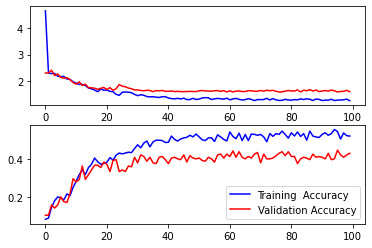

In [38]:

#After successful training, we will visualize its performance.

import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

AttributeError: 'Model' object has no attribute 'predict_classes'

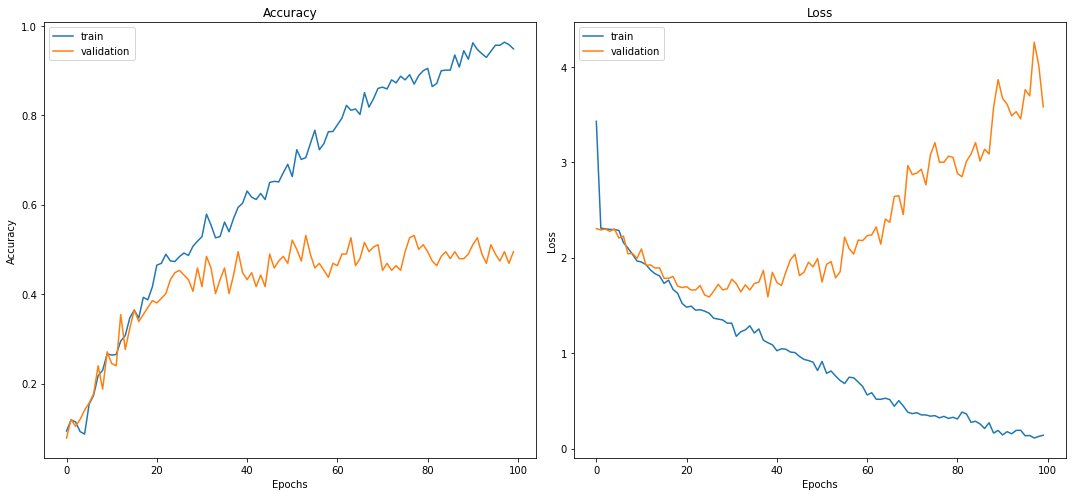

In [25]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
preds = np.argmax(model.predict(x_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)

Normalized confusion matrix


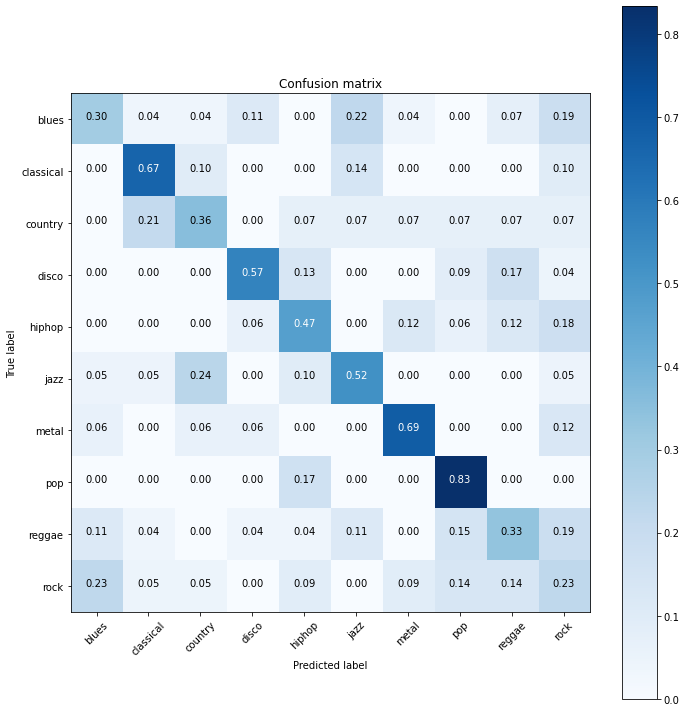

In [35]:
from collections import OrderedDict
import itertools
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, keys, normalize=True)

NameError: name 'label' is not defined

In [35]:
pred = model.predict(x_test)

pred.shape

(200, 10)

IndexError: arrays used as indices must be of integer (or boolean) type

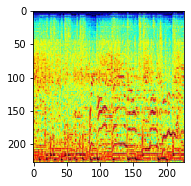

In [36]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

NameError: name 'hist' is not defined

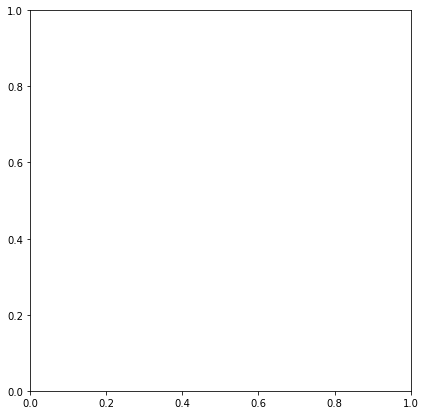

In [37]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
history_dict = hist.history
print(history_dict.keys())